In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('input/train.csv')
#sample_submission_zero= pd.read_csv('../input/sample_submission_zero.csv')
members = pd.read_csv('input/members_v3.csv')
transactions = pd.read_csv('input/transactions.csv')
#user_logs = pd.read_csv('../input/user_logs.csv',nrows = 2e7)

In [4]:
train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992931 entries, 0 to 992930
Data columns (total 2 columns):
msno        992931 non-null object
is_churn    992931 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.2+ MB


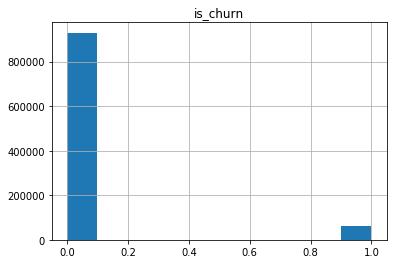

In [6]:
train.hist()
plt.show()

In [7]:
training = pd.merge(left = train,right = members,how = 'left',on=['msno'])
training.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0


In [8]:
training['city'] = training.city.apply(lambda x: int(x) if pd.notnull(x) else "NAN")
training['registered_via'] = training.registered_via.apply(lambda x: int(x) if pd.notnull(x) else "NAN")
training['gender']=training['gender'].fillna("NAN")
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 7 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int64
city                      992931 non-null object
bd                        877161 non-null float64
gender                    992931 non-null object
registered_via            992931 non-null object
registration_init_time    877161 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 60.6+ MB
